# 1st Assignment

Marina Samprovalaki f3322310  </n>

Petros Chanas f3322314

In the 1st Assignment we had to create some n-gram language models in order to implement a context-aware spelling corrector

We assume that each sentence starts with the
pseudo-token *start* (or two pseudo-tokens *start1*, *start2* for the trigram model) and ends with the pseudo-token *end*.


# Libraries Installation

In [1]:
!pip install -U nltk

In [2]:
pip install tabulate

In [3]:
import nltk

nltk.download('punkt')
from nltk.tokenize import sent_tokenize
from nltk import word_tokenize
from nltk.tokenize import TweetTokenizer

import random
import math
from tabulate import tabulate

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [4]:
nltk.download('all')


[nltk_data] Downloading collection 'all'
[nltk_data]    | 
[nltk_data]    | Downloading package abc to /root/nltk_data...
[nltk_data]    |   Package abc is already up-to-date!
[nltk_data]    | Downloading package alpino to /root/nltk_data...
[nltk_data]    |   Package alpino is already up-to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger is already up-
[nltk_data]    |       to-date!
[nltk_data]    | Downloading package averaged_perceptron_tagger_ru to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package averaged_perceptron_tagger_ru is already
[nltk_data]    |       up-to-date!
[nltk_data]    | Downloading package basque_grammars to
[nltk_data]    |     /root/nltk_data...
[nltk_data]    |   Package basque_grammars is already up-to-date!
[nltk_data]    | Downloading package bcp47 to /root/nltk_data...
[nltk_data]    |   Package bcp47 is already up-to-dat

True

# Selecting a corpus

A corpus is a collection of text that serves as a valuable resource for language analysis, training models, and conducting research. As per the assignment's description, we recommend choosing a corpus from the [link](http://www.nltk.org/). We selected the Alice's Adventures in Wonderland, a novel by Lewis Carroll. We found this corpus in the Gutenberg Corpus​​ NLTK.

In [5]:
nltk.download("gutenberg")
from nltk.corpus import gutenberg

[nltk_data] Downloading package gutenberg to /root/nltk_data...
[nltk_data]   Package gutenberg is already up-to-date!


In [6]:
# Access and print the text of "Alice's Adventures in Wonderland"
alice_text = gutenberg.raw("carroll-alice.txt")
print(alice_text[:500])  # Print the first 500 characters as a sample


[Alice's Adventures in Wonderland by Lewis Carroll 1865]

CHAPTER I. Down the Rabbit-Hole

Alice was beginning to get very tired of sitting by her sister on the
bank, and of having nothing to do: once or twice she had peeped into the
book her sister was reading, but it had no pictures or conversations in
it, 'and what is the use of a book,' thought Alice 'without pictures or
conversation?'

So she was considering in her own mind (as well as she could, for the
hot day made her feel very sleepy an


## Lowercases

In [7]:
# Convert to lowercase and split by newlines
alice_text = alice_text.lower().split('\n')
alice_text

["[alice's adventures in wonderland by lewis carroll 1865]",
 '',
 'chapter i. down the rabbit-hole',
 '',
 'alice was beginning to get very tired of sitting by her sister on the',
 'bank, and of having nothing to do: once or twice she had peeped into the',
 'book her sister was reading, but it had no pictures or conversations in',
 "it, 'and what is the use of a book,' thought alice 'without pictures or",
 "conversation?'",
 '',
 'so she was considering in her own mind (as well as she could, for the',
 'hot day made her feel very sleepy and stupid), whether the pleasure',
 'of making a daisy-chain would be worth the trouble of getting up and',
 'picking the daisies, when suddenly a white rabbit with pink eyes ran',
 'close by her.',
 '',
 'there was nothing so very remarkable in that; nor did alice think it so',
 "very much out of the way to hear the rabbit say to itself, 'oh dear!",
 "oh dear! i shall be late!' (when she thought it over afterwards, it",
 'occurred to her that she oug

# Dividing the dataset

To facilitate the development and evaluation of n-gram models, it is essential to divide our corpus into three distinct subsets. The train set, used for training, the valid set for validation, and the test set for conducting tests, have been created with shuffling to prevent biases.


In [8]:
import random

# Define the ratios for splitting
train_ratio = 0.7  # 70% for training
valid_ratio = 0.15  # 15% for validation
test_ratio = 0.15  # 15% for testing


# Shuffle the alice_text to ensure randomness
random.shuffle(alice_text)

# Calculate the split points based on the ratios
total_alice_text = len(alice_text)
train_split = int(total_alice_text * train_ratio)
valid_split = train_split + int(total_alice_text * valid_ratio)

# Split the alice_text into subsets
train_set = alice_text[:train_split]
valid_set = alice_text[train_split:valid_split]
test_set = alice_text[valid_split:]

# Join the alice_text back into text if needed
train_text = '\n'.join(train_set)
valid_text = '\n'.join(valid_set)
test_text = '\n'.join(test_set)


In [9]:
train_text

'plenty of time as she went down to look about her and to wonder what was\n\'--yes, that\'s about the right distance--but then i wonder what latitude\nadded \'it isn\'t a letter, after all: it\'s a set of verses.\'\npresents to one\'s own feet! and how odd the directions will look!\nremarked, \'if you can\'t be civil, you\'d better finish the story for\n\nrather a handsome pig, i think.\' and she began thinking over other\nthat there was no time to be lost, as she was shrinking rapidly; so she\n\'you ought to be ashamed of yourself for asking such a simple question,\'\n\n\n\nwhat they\'re about!\'\ncertainly did not, being made entirely of cardboard.)\nalice was more and more puzzled, but she thought there was no use in\n\n     morning i\'ve\n\'nothing whatever,\' said alice.\n\nbend, i think?\'\n\nlike them raw.\'\n\nwalking by the white rabbit, who was peeping anxiously into her face.\nthen the rabbit\'s voice along--\'catch him, you by the hedge!\' then\n\nturtle, suddenly dropping 

In [10]:
valid_text

'\nshe\'ll eat a little bird as soon as look at it!\'\n\n\nfriend.\n\'there might be some sense in your knocking,\' the footman went on\n    do you think, at your age, it is right?\'\nenough for it to speak with.\n   soup of the evening, beautiful soup!\nthing!\' said the queen, \'and take this young lady to see the mock\nthis sounded promising, certainly: alice turned and came back again.\n\n\nskimming out, straight at the footman\'s head: it just grazed his nose,\n\'oh! so bill\'s got to come down the chimney, has he?\' said alice to\n\nit must be a walrus or hippopotamus, but then she remembered how small\n\nthese were the verses the white rabbit read:--\nout with his nose, you know?\'\n\'unimportant, of course, i meant,\' the king hastily said, and went on\n\'stuff and nonsense!\' said alice loudly. \'the idea of having the\n\'so you did, old fellow!\' said the others.\ncrown. william\'s conduct at first was moderate. but the insolence of his\ncan do no more, whatever happens. what

In [11]:
test_text

'on.\'\n\'well!\' thought alice to herself, \'after such a fall as this, i shall\nabout them in books, and she was quite pleased to find that she knew\n\'and ever since that,\' the hatter went on in a mournful tone, \'he won\'t\ngot up, and began to repeat it, but her head was so full of the lobster\ngoing to happen next. first, she tried to look down and make out what\nthis was her dream:--\n           alice\'s evidence\n\'when we were little,\' the mock turtle went on at last, more calmly,\nthe long grass rustled at her feet as the white rabbit hurried by--the\nrome--no, that\'s all wrong, i\'m certain! i must have been changed for\nnow, if you only kept on good terms with him, he\'d do almost anything\nthrough the little door into that lovely garden. first, however, she\n\'then you should say what you mean,\' the march hare went on.\nlikely it can talk: at any rate, there\'s no harm in trying.\' so she\n\nmajesty,\' he began, \'for bringing these in: but i hadn\'t quite finished\n\n

# Train Subset Preprocessing

## Vocabulary

In [13]:
import nltk
from collections import Counter

# Tokenize the text
words = nltk.word_tokenize(train_text)

# Count word frequencies
word_frequencies = Counter(words)

# Sort word frequencies by count in descending order
sorted_word_frequencies = dict(sorted(word_frequencies.items(), key=lambda item: item[1], reverse=True))

# Print sorted word frequencies
for word, frequency in sorted_word_frequencies.items():
    print(f"{word}: {frequency}")


,: 1680
the: 1132
': 942
.: 718
and: 571
to: 495
a: 460
i: 385
she: 374
it: 371
of: 349
said: 322
!: 311
alice: 273
you: 264
in: 248
was: 246
that: 195
--: 186
her: 172
as: 170
:: 159
at: 150
n't: 149
?: 144
had: 141
's: 135
with: 134
all: 131
;: 129
on: 125
be: 110
so: 106
for: 100
not: 100
this: 99
they: 92
little: 91
he: 90
very: 90
but: 87
do: 80
what: 79
out: 79
is: 75
down: 71
up: 69
his: 68
about: 65
one: 63
know: 63
would: 63
then: 62
again: 61
went: 59
there: 59
have: 59
were: 59
did: 58
thought: 58
like: 57
them: 56
could: 56
queen: 56
herself: 55
or: 55
if: 54
no: 53
time: 51
when: 50
who: 48
'': 48
your: 47
into: 46
me: 46
off: 45
see: 45
'you: 44
king: 44
turtle: 43
my: 43
hatter: 43
'm: 42
an: 42
think: 41
began: 41
go: 41
say: 40
by: 39
gryphon: 39
mock: 39
how: 38
(: 38
head: 37
its: 37
'it: 36
): 36
way: 36
much: 35
just: 35
'and: 35
got: 35
voice: 34
never: 34
some: 34
quite: 34
only: 34
'll: 33
first: 33
here: 33
now: 33
*: 33
mouse: 32
duchess: 32
their: 32
after: 3

In [14]:
# Filter words with frequency > 10
filtered_word_frequencies = {word: frequency for word, frequency in word_frequencies.items() if frequency > 10}

# Sort word frequencies by count in descending order
sorted_word_frequencies = dict(sorted(filtered_word_frequencies.items(), key=lambda item: item[1], reverse=True))


In [15]:
vocab = filtered_word_frequencies
vocab

{'of': 349,
 'time': 51,
 'as': 170,
 'she': 374,
 'went': 59,
 'down': 71,
 'to': 495,
 'look': 16,
 'about': 65,
 'her': 172,
 'and': 571,
 'wonder': 14,
 'what': 79,
 'was': 246,
 "'": 942,
 '--': 186,
 ',': 1680,
 'that': 195,
 "'s": 135,
 'the': 1132,
 'right': 20,
 'but': 87,
 'then': 62,
 'i': 385,
 'added': 19,
 "'it": 36,
 'is': 75,
 "n't": 149,
 'a': 460,
 'after': 31,
 'all': 131,
 ':': 159,
 'it': 371,
 '.': 718,
 'one': 63,
 '!': 311,
 'how': 38,
 'will': 23,
 "'if": 16,
 'you': 264,
 'ca': 19,
 'be': 110,
 "'d": 20,
 'better': 11,
 'for': 100,
 'rather': 18,
 'think': 41,
 'began': 41,
 'over': 29,
 'other': 29,
 'there': 59,
 'no': 53,
 ';': 129,
 'so': 106,
 "'you": 44,
 'ought': 11,
 'such': 31,
 'question': 15,
 'they': 92,
 "'re": 30,
 'did': 58,
 'not': 100,
 'being': 11,
 'made': 28,
 ')': 36,
 'alice': 273,
 'more': 31,
 'thought': 58,
 'use': 16,
 'in': 248,
 'said': 322,
 '?': 144,
 'like': 57,
 'them': 56,
 'by': 39,
 'white': 16,
 'rabbit': 25,
 'who': 48,
 'i

In [16]:
len(vocab)

270

## OOV

In [17]:
filtered_words = [word if word_frequencies[word] > 10 else "UNK" for word in words]
filtered_words

['UNK',
 'of',
 'time',
 'as',
 'she',
 'went',
 'down',
 'to',
 'look',
 'about',
 'her',
 'and',
 'to',
 'wonder',
 'what',
 'was',
 "'",
 '--',
 'UNK',
 ',',
 'that',
 "'s",
 'about',
 'the',
 'right',
 'UNK',
 '--',
 'but',
 'then',
 'i',
 'wonder',
 'what',
 'UNK',
 'added',
 "'it",
 'is',
 "n't",
 'a',
 'UNK',
 ',',
 'after',
 'all',
 ':',
 'it',
 "'s",
 'a',
 'UNK',
 'of',
 'UNK',
 '.',
 "'",
 'UNK',
 'to',
 'one',
 "'s",
 'UNK',
 'UNK',
 '!',
 'and',
 'how',
 'UNK',
 'the',
 'UNK',
 'will',
 'look',
 '!',
 'UNK',
 ',',
 "'if",
 'you',
 'ca',
 "n't",
 'be',
 'UNK',
 ',',
 'you',
 "'d",
 'better',
 'UNK',
 'the',
 'UNK',
 'for',
 'rather',
 'a',
 'UNK',
 'UNK',
 ',',
 'i',
 'think',
 '.',
 "'",
 'and',
 'she',
 'began',
 'UNK',
 'over',
 'other',
 'that',
 'there',
 'was',
 'no',
 'time',
 'to',
 'be',
 'UNK',
 ',',
 'as',
 'she',
 'was',
 'UNK',
 'UNK',
 ';',
 'so',
 'she',
 "'you",
 'ought',
 'to',
 'be',
 'UNK',
 'of',
 'UNK',
 'for',
 'UNK',
 'such',
 'a',
 'UNK',
 'question'

In [18]:
# Count OOV words
oov_count = filtered_words.count("UNK")

print("Number of OOV words:", oov_count)

Number of OOV words: 4891


In [19]:
train_text = " ".join([word if word_frequencies[word] > 10 else "UNK" for word in words])
train_text

"UNK of time as she went down to look about her and to wonder what was ' -- UNK , that 's about the right UNK -- but then i wonder what UNK added 'it is n't a UNK , after all : it 's a UNK of UNK . ' UNK to one 's UNK UNK ! and how UNK the UNK will look ! UNK , 'if you ca n't be UNK , you 'd better UNK the UNK for rather a UNK UNK , i think . ' and she began UNK over other that there was no time to be UNK , as she was UNK UNK ; so she 'you ought to be UNK of UNK for UNK such a UNK question , ' what they 're about ! ' UNK did not , being made UNK of UNK . ) alice was more and more UNK , but she thought there was no use in UNK UNK UNK UNK , ' said alice . UNK , i think ? ' like them UNK . ' UNK by the white rabbit , who was UNK UNK into her UNK . then the rabbit 's voice UNK -- UNK him , you by the UNK ! ' then turtle , UNK UNK his voice ; and the two UNK , who had been it into his UNK of UNK , and looked at it again : but he could think of it out again , and put it right ; UNK that it U

In [20]:
def replace_oov_in_text(text):
    # Tokenize the input text into words
    tokens = word_tokenize(text)

    # Replace OOV words with "UNK" and join them back into plain text
    plain_text = ' '.join(["UNK" if token not in vocab else token for token in tokens])

    return plain_text

In [21]:
valid_text = replace_oov_in_text(valid_text)
valid_text

"she 'll UNK a little UNK as soon as look at it ! ' UNK . UNK might be some UNK in your UNK , ' the UNK went on do you think , at your UNK , it is right ? ' enough for it to UNK with . soup of the UNK , UNK soup ! thing ! ' said the queen , 'and take this UNK UNK to see the mock this UNK UNK , UNK : alice UNK and came back again . UNK out , UNK at the UNK 's head : it just UNK his UNK , 'oh ! so bill 's got to come down the UNK , UNK he ? ' said alice to it must be a UNK or UNK , but then she UNK how UNK UNK were the UNK the white rabbit UNK : -- out with his UNK , you know ? ' UNK , of course , i UNK , ' the king UNK said , and went on UNK and UNK ! ' said alice UNK . 'the UNK of UNK the UNK you did , old UNK ! ' said the UNK . UNK . UNK 's UNK at first was UNK . but the UNK of his can do no more , UNK UNK . what will UNK of me ? ' when they take UNK up and UNK UNK , with the UNK , out to UNK ! '' to make out which were the two UNK of it ; and as it was UNK of UNK , ' i do wish they w

In [22]:
test_text = replace_oov_in_text(test_text)
test_text

"on . ' 'well ! ' thought alice to herself , UNK such a UNK as this , i shall about them in UNK , and she was quite UNK to find that she UNK 'and ever UNK that , ' the hatter went on in a UNK tone , UNK UNK got up , and began to UNK it , but her head was so UNK of the UNK going to UNK next . first , she tried to look down and make out what this was her UNK : -- alice 's UNK UNK we were little , ' the mock turtle went on at last , more UNK , the long UNK UNK at her UNK as the white rabbit UNK by -- the UNK -- no , that 's all UNK , i 'm UNK ! i must have been UNK for now , if you only UNK on good UNK with him , he 'd do UNK anything UNK the little door into that UNK garden . first , however , she UNK you should say what you UNK , ' the march hare went on . UNK it can UNK : at any UNK , there 's no UNK in UNK . ' so she UNK , ' he began , UNK UNK UNK in : but i had n't quite UNK it to make it UNK . UNK UNK UNK UNK , ' said the hatter . he had been looking at alice UNK that had UNK down f

## Tokenization in sentences

Dividing a block of text into individual sentences.

In [23]:
import nltk
nltk.download('punkt')
from nltk import sent_tokenize

sentences = sent_tokenize(train_text)

for sent in sentences:
    print(sent)
    print("_________________")

UNK of time as she went down to look about her and to wonder what was ' -- UNK , that 's about the right UNK -- but then i wonder what UNK added 'it is n't a UNK , after all : it 's a UNK of UNK . '
_________________
UNK to one 's UNK UNK !
_________________
and how UNK the UNK will look !
_________________
UNK , 'if you ca n't be UNK , you 'd better UNK the UNK for rather a UNK UNK , i think . '
_________________
and she began UNK over other that there was no time to be UNK , as she was UNK UNK ; so she 'you ought to be UNK of UNK for UNK such a UNK question , ' what they 're about ! '
_________________
UNK did not , being made UNK of UNK . )
_________________
alice was more and more UNK , but she thought there was no use in UNK UNK UNK UNK , ' said alice .
_________________
UNK , i think ? '
_________________
like them UNK . '
_________________
UNK by the white rabbit , who was UNK UNK into her UNK .
_________________
then the rabbit 's voice UNK -- UNK him , you by the UNK ! '
_____

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


_________________
UNK UNK she UNK were UNK into UNK by the UNK , 'well , i ca n't UNK it you UNK , ' the mock turtle said : ' i 'm too an UNK of UNK off a little of her UNK .
_________________
UNK think of UNK one as long as you UNK . '
_________________
UNK the UNK .
_________________
* * * * * * the mock turtle went on .
_________________
began .
_________________
alice thought she had never UNK such a curious UNK in chapter UNK .
_________________
the rabbit UNK in a little bill UNK is so UNK down here , that i should think very UNK side will make you UNK UNK , and the other side will make you UNK ! '
_________________
alice replied in a very UNK voice .
_________________
herself , ' i do n't see how he can even UNK , if he does n't UNK . '
_________________
but UNK you UNK to be UNK ! '
_________________
UNK down all three UNK on their UNK , and then added them up , and of the UNK , and one UNK up the UNK , and said to herself UNK i UNK arm , you UNK !
_________________
who ever UN

## Tokenization (word level)

NLTK offers various methods for splitting your text into individual words or tokens. In this case, we will utilize the TweetTokenizer for this purpose.

In [24]:
from nltk import word_tokenize
from nltk.tokenize import TweetTokenizer

tweet_wt = TweetTokenizer()

sentences_tokenized = []

for sent in sentences:
    sent_tok = tweet_wt.tokenize(sent)
    sentences_tokenized.append(sent_tok)
    print(sent_tok)
    print("_________________")


['UNK', 'of', 'time', 'as', 'she', 'went', 'down', 'to', 'look', 'about', 'her', 'and', 'to', 'wonder', 'what', 'was', "'", '-', '-', 'UNK', ',', 'that', "'", 's', 'about', 'the', 'right', 'UNK', '-', '-', 'but', 'then', 'i', 'wonder', 'what', 'UNK', 'added', "'", 'it', 'is', "n't", 'a', 'UNK', ',', 'after', 'all', ':', 'it', "'", 's', 'a', 'UNK', 'of', 'UNK', '.', "'"]
_________________
['UNK', 'to', 'one', "'", 's', 'UNK', 'UNK', '!']
_________________
['and', 'how', 'UNK', 'the', 'UNK', 'will', 'look', '!']
_________________
['UNK', ',', "'", 'if', 'you', 'ca', "n't", 'be', 'UNK', ',', 'you', "'", 'd', 'better', 'UNK', 'the', 'UNK', 'for', 'rather', 'a', 'UNK', 'UNK', ',', 'i', 'think', '.', "'"]
_________________
['and', 'she', 'began', 'UNK', 'over', 'other', 'that', 'there', 'was', 'no', 'time', 'to', 'be', 'UNK', ',', 'as', 'she', 'was', 'UNK', 'UNK', ';', 'so', 'she', "'", 'you', 'ought', 'to', 'be', 'UNK', 'of', 'UNK', 'for', 'UNK', 'such', 'a', 'UNK', 'question', ',', "'", 'w

In [25]:
from pprint import pprint

tokens = tweet_wt.tokenize(train_text)
tokens

['UNK',
 'of',
 'time',
 'as',
 'she',
 'went',
 'down',
 'to',
 'look',
 'about',
 'her',
 'and',
 'to',
 'wonder',
 'what',
 'was',
 "'",
 '-',
 '-',
 'UNK',
 ',',
 'that',
 "'",
 's',
 'about',
 'the',
 'right',
 'UNK',
 '-',
 '-',
 'but',
 'then',
 'i',
 'wonder',
 'what',
 'UNK',
 'added',
 "'",
 'it',
 'is',
 "n't",
 'a',
 'UNK',
 ',',
 'after',
 'all',
 ':',
 'it',
 "'",
 's',
 'a',
 'UNK',
 'of',
 'UNK',
 '.',
 "'",
 'UNK',
 'to',
 'one',
 "'",
 's',
 'UNK',
 'UNK',
 '!',
 'and',
 'how',
 'UNK',
 'the',
 'UNK',
 'will',
 'look',
 '!',
 'UNK',
 ',',
 "'",
 'if',
 'you',
 'ca',
 "n't",
 'be',
 'UNK',
 ',',
 'you',
 "'",
 'd',
 'better',
 'UNK',
 'the',
 'UNK',
 'for',
 'rather',
 'a',
 'UNK',
 'UNK',
 ',',
 'i',
 'think',
 '.',
 "'",
 'and',
 'she',
 'began',
 'UNK',
 'over',
 'other',
 'that',
 'there',
 'was',
 'no',
 'time',
 'to',
 'be',
 'UNK',
 ',',
 'as',
 'she',
 'was',
 'UNK',
 'UNK',
 ';',
 'so',
 'she',
 "'",
 'you',
 'ought',
 'to',
 'be',
 'UNK',
 'of',
 'UNK',
 'for

## Tokens Frequency

Token frequency simply counts how often individual words or phrases appear in a text or dataset.

In [26]:
# Frequency distribution
N = 100
count = nltk.FreqDist(tokens)
print('{} most common tokens: \n')

pprint(count.most_common(N))

{} most common tokens: 

[('UNK', 4891),
 (',', 1680),
 ("'", 1619),
 ('the', 1148),
 ('.', 718),
 ('and', 606),
 ('to', 495),
 ('a', 460),
 ('it', 407),
 ('i', 385),
 ('she', 374),
 ('-', 372),
 ('of', 349),
 ('said', 322),
 ('!', 311),
 ('you', 308),
 ('alice', 273),
 ('in', 248),
 ('was', 246),
 ('that', 217),
 ('her', 172),
 ('as', 170),
 (':', 159),
 ('at', 150),
 ("n't", 149),
 ('?', 144),
 ('had', 141),
 ('s', 135),
 ('with', 134),
 ('all', 131),
 (';', 129),
 ('on', 125),
 ('but', 117),
 ('be', 110),
 ('so', 106),
 ('what', 105),
 ('for', 100),
 ('not', 100),
 ('this', 99),
 ('they', 92),
 ('do', 92),
 ('little', 91),
 ('he', 90),
 ('very', 90),
 ('out', 79),
 ('is', 75),
 ('down', 71),
 ('if', 70),
 ('up', 69),
 ('his', 68),
 ('about', 65),
 ('one', 63),
 ('know', 63),
 ('would', 63),
 ('then', 62),
 ('again', 61),
 ('went', 59),
 ('there', 59),
 ('have', 59),
 ('were', 59),
 ('did', 58),
 ('thought', 58),
 ('like', 57),
 ('them', 56),
 ('could', 56),
 ('queen', 56),
 ('hersel

# Create and count n-grams frequency with zip function

The [zip function](https://www.w3schools.com/python/ref_func_zip.asp) in Python is used to combine two or more iterables (e.g., lists, tuples) element-wise into tuples. When used to create n-grams, you can use it to pair words or tokens from a text to form n-grams by sliding a "window" of a specific size over the sequence

In [27]:
unigram_counter = Counter()
bigram_counter = Counter()
trigram_counter = Counter()

for sent in sentences_tokenized:

    # Update the unigram counter
    unigram_counter.update([(gram,) for gram in sent])

    # Update the bigram counter
    bigram_pad_sent = ["<start>"] + sent +  ["<end>"]
    bigram_counter.update([(gram1, gram2) for gram1, gram2 in zip(bigram_pad_sent, bigram_pad_sent[1:])])

    # Update the trigram counter
    trigram_pad_sent = ["<start1>", "<start2>"] + sent + ["<end>"]
    trigram_counter.update([(gram1, gram2, gram3) for gram1, gram2, gram3 in zip(trigram_pad_sent, trigram_pad_sent[1:], trigram_pad_sent[2:])])


pprint(unigram_counter.most_common(10))
pprint(bigram_counter.most_common(10))
pprint(trigram_counter.most_common(10))

[(('UNK',), 4891),
 ((',',), 1680),
 (("'",), 1619),
 (('the',), 1148),
 (('.',), 718),
 (('and',), 606),
 (('to',), 495),
 (('a',), 460),
 (('it',), 407),
 (('i',), 385)]
[(('UNK', ','), 757),
 (('UNK', 'UNK'), 709),
 (("'", '<end>'), 516),
 (('.', '<end>'), 512),
 (('the', 'UNK'), 495),
 ((',', "'"), 375),
 (('UNK', '.'), 344),
 ((',', 'and'), 308),
 (('<start>', 'UNK'), 285),
 (('a', 'UNK'), 251)]
[(('<start1>', '<start2>', 'UNK'), 285),
 (('UNK', '.', '<end>'), 241),
 (('!', "'", '<end>'), 199),
 (('.', "'", '<end>'), 188),
 (('UNK', ',', 'and'), 168),
 (('UNK', ',', "'"), 161),
 ((',', "'", 'said'), 152),
 (('UNK', 'UNK', ','), 120),
 (('UNK', ',', 'UNK'), 116),
 (('<start1>', '<start2>', "'"), 110)]


#  Calculate bi-gram probability

### $ P(w_2|w_1) = \frac{C(w_1,w_2) + \alpha}{C(w_1) + \alpha \cdot|V|} $

* $ C(w_1,w_2) $ : bigram count
* $ C(w_1) $ : unigram count
* $ 0 \leq\alpha \leq1 $ :  smoothing hyper-parameter
* |V|: vocabulary size

In [28]:
# We should fine-tune alpha on a held-out dataset
alpha = 0.01

# Calculate vocab size
# vocab_size = len(set(tokens))
vocab_size = len(vocab)

In [29]:
vocab_size

270

In [30]:
# Bigram prob + laplace smoothing
bigram_prob = (bigram_counter[('the', 'evening')] + alpha) / (unigram_counter[('the')] + alpha*vocab_size)
print("bigram_prob: {0:.3f} ".format(bigram_prob))

bigram_log_prob = math.log2(bigram_prob)
print("bigram_log_prob: {0:.3f}".format(bigram_log_prob) )

bigram_prob: 0.004 
bigram_log_prob: -8.077


### Kneser-Ney Smoothing
$$P_{abs}(w_i|w_{i -1}) = \frac{\max((c(w_{i-1}w_i)-\delta), 0)}{\sum\limits_{w'}c(w_{i-1}w')} + a\cdot p_{abs}(w_i)$$

In [31]:
# Parameters for Kneser-Ney smoothing
discount = 0.75  # Discount value for Kneser-Ney smoothing
# vocabulary_size = len(unigram_counter)  # Size of the vocabulary

# Bigram count
bigram_count = bigram_counter[('the', 'evening')]

# Unigram count
unigram_count = unigram_counter[('the')]

# Calculate the continuation count (number of distinct words that follow 'evening')
continuation_count = sum(1 for sent in sentences_tokenized if 'evening' in sent)

# Calculate Kneser-Ney smoothed bigram probability
if unigram_count > 0:
    bigram_prob_kneser_ney = max((bigram_count - discount) / unigram_count, 0) + (discount / unigram_count) * (continuation_count / vocab_size)
else:
    # Handle the case when unigram_count is zero
    bigram_prob_kneser_ney = (discount / (unigram_count + 1)) * (continuation_count / vocab_size)

# Check for non-positive probability and set a minimum probability
epsilon = 1e-10  # A small positive value to avoid math domain error
if bigram_prob_kneser_ney <= 0:
    bigram_prob_kneser_ney = epsilon

bigram_log_prob_kneser_ney = math.log2(bigram_prob_kneser_ney)

print("Kneser-Ney smoothed bigram_prob: {0:.10f}".format(bigram_prob_kneser_ney))
print("Kneser-Ney smoothed bigram_log_prob: {0:.6f}".format(bigram_log_prob_kneser_ney))


Kneser-Ney smoothed bigram_prob: 0.0000000001
Kneser-Ney smoothed bigram_log_prob: -33.219281


### Interpolated Kneser-Ney

$$P_{KN}(w_i|w_{i-1}) = \frac{\max((c(w_{i-1}w_i)-\delta), 0)}{c(w_{i-1})} + \lambda\frac{|{w_{i -1}:c(w_{i-1}, w_i) > 0}|}{|{w_{j -1}:c(w_{j-1}, w_j) > 0}|}$$

In [32]:
# Parameters for Kneser-Ney smoothing
discount = 0.75  # Discount value for Kneser-Ney smoothing

# Trigram count
trigram_count = trigram_counter[('the', 'evening', 'is')]

# Bigram count
bigram_count = bigram_counter[('evening', 'is')]

# Unigram count
unigram_count = unigram_counter[('the')]

# Calculate the continuation count (number of distinct words that follow the bigram 'evening is')
continuation_count = sum(1 for sent in sentences_tokenized if ('evening', 'is') in zip(sent, sent[1:]))

# Define the interpolation weights
lambda1 = 0.5  # You can adjust the interpolation weights as needed
lambda2 = 1 - lambda1

# Handle the case when bigram_count is zero
if bigram_count == 0:
    bigram_count = 1  # Assign a small non-zero value

# Calculate Kneser-Ney smoothed trigram probability using interpolation
trigram_prob_kneser_ney = (
    lambda1 * max((trigram_count - discount), 0) / bigram_count +
    lambda2 * continuation_count / vocab_size
)

# Check for non-positive probability and set a minimum probability
epsilon = 1e-10  # A small positive value to avoid math domain error
if trigram_prob_kneser_ney <= 0:
    trigram_prob_kneser_ney = epsilon

trigram_log_prob_kneser_ney = math.log2(trigram_prob_kneser_ney)

print("Interpolated Kneser-Ney smoothed trigram_prob: {0:.10f}".format(trigram_prob_kneser_ney))
print("Interpolated Kneser-Ney smoothed trigram_log_prob: {0:.6f}".format(trigram_log_prob_kneser_ney))


Interpolated Kneser-Ney smoothed trigram_prob: 0.0000000001
Interpolated Kneser-Ney smoothed trigram_log_prob: -33.219281


#  Calculate tri-gram probability

### $ P(w_3|w_1,w_2) = \frac{C(w_1,w_2,w_3) + \alpha}{C(w_1,w_2) + \alpha \cdot|V|} $
Where:

$ C(w_1, w_2, w_3) $: Trigram count, the number of times the trigram (w1, w2, w3) appears in the corpus.
$ C(w_1, w_2) $: Bigram count, the number of times the bigram (w1, w2) appears in the corpus.
$ 0 \leq \alpha \leq 1 $: Smoothing hyper-parameter.
$ |V| $: Vocabulary size, the total number of unique words in the corpus.

In [33]:
# Triagram prob + laplace smoothing
triagram_prob = (trigram_counter[('the', 'evening','is')] + alpha) / (bigram_counter[('the','evening')] + alpha*vocab_size)
print("triagram_prob: {0:.3f} ".format(bigram_prob))

triagram_log_prob = math.log2(triagram_prob)
print("triagram_log_prob: {0:.3f}".format(triagram_log_prob) )

triagram_prob: 0.004 
triagram_log_prob: -8.077


## Test subset

We have to tokenize our test subset in tokens.

In [34]:
test_text

"on . ' 'well ! ' thought alice to herself , UNK such a UNK as this , i shall about them in UNK , and she was quite UNK to find that she UNK 'and ever UNK that , ' the hatter went on in a UNK tone , UNK UNK got up , and began to UNK it , but her head was so UNK of the UNK going to UNK next . first , she tried to look down and make out what this was her UNK : -- alice 's UNK UNK we were little , ' the mock turtle went on at last , more UNK , the long UNK UNK at her UNK as the white rabbit UNK by -- the UNK -- no , that 's all UNK , i 'm UNK ! i must have been UNK for now , if you only UNK on good UNK with him , he 'd do UNK anything UNK the little door into that UNK garden . first , however , she UNK you should say what you UNK , ' the march hare went on . UNK it can UNK : at any UNK , there 's no UNK in UNK . ' so she UNK , ' he began , UNK UNK UNK in : but i had n't quite UNK it to make it UNK . UNK UNK UNK UNK , ' said the hatter . he had been looking at alice UNK that had UNK down f

In [35]:
test_sentences = sent_tokenize(test_text)

for sent in test_sentences:
    print(sent)
    print("_________________")

on . '
_________________
'well ! '
_________________
thought alice to herself , UNK such a UNK as this , i shall about them in UNK , and she was quite UNK to find that she UNK 'and ever UNK that , ' the hatter went on in a UNK tone , UNK UNK got up , and began to UNK it , but her head was so UNK of the UNK going to UNK next .
_________________
first , she tried to look down and make out what this was her UNK : -- alice 's UNK UNK we were little , ' the mock turtle went on at last , more UNK , the long UNK UNK at her UNK as the white rabbit UNK by -- the UNK -- no , that 's all UNK , i 'm UNK !
_________________
i must have been UNK for now , if you only UNK on good UNK with him , he 'd do UNK anything UNK the little door into that UNK garden .
_________________
first , however , she UNK you should say what you UNK , ' the march hare went on .
_________________
UNK it can UNK : at any UNK , there 's no UNK in UNK . '
_________________
so she UNK , ' he began , UNK UNK UNK in : but i had

In [36]:
from nltk import word_tokenize
from nltk import WhitespaceTokenizer
from nltk.tokenize import TweetTokenizer

tweet_wt = TweetTokenizer()

test_sentences_tokenized = []

for sent in test_sentences:
    sent_tok = tweet_wt.tokenize(sent)
    test_sentences_tokenized.append(sent_tok)
    print(sent_tok)
    print("_________________")


['on', '.', "'"]
_________________
["'", 'well', '!', "'"]
_________________
['thought', 'alice', 'to', 'herself', ',', 'UNK', 'such', 'a', 'UNK', 'as', 'this', ',', 'i', 'shall', 'about', 'them', 'in', 'UNK', ',', 'and', 'she', 'was', 'quite', 'UNK', 'to', 'find', 'that', 'she', 'UNK', "'", 'and', 'ever', 'UNK', 'that', ',', "'", 'the', 'hatter', 'went', 'on', 'in', 'a', 'UNK', 'tone', ',', 'UNK', 'UNK', 'got', 'up', ',', 'and', 'began', 'to', 'UNK', 'it', ',', 'but', 'her', 'head', 'was', 'so', 'UNK', 'of', 'the', 'UNK', 'going', 'to', 'UNK', 'next', '.']
_________________
['first', ',', 'she', 'tried', 'to', 'look', 'down', 'and', 'make', 'out', 'what', 'this', 'was', 'her', 'UNK', ':', '-', '-', 'alice', "'", 's', 'UNK', 'UNK', 'we', 'were', 'little', ',', "'", 'the', 'mock', 'turtle', 'went', 'on', 'at', 'last', ',', 'more', 'UNK', ',', 'the', 'long', 'UNK', 'UNK', 'at', 'her', 'UNK', 'as', 'the', 'white', 'rabbit', 'UNK', 'by', '-', '-', 'the', 'UNK', '-', '-', 'no', ',', 'that',

In [37]:
len(test_sentences_tokenized)

229

## Bi-gram LM Cross entropy & perplexity

* $ CrossEntropy = -\frac{1}{N}\sum^{bigrams}{log_2(P(w_2|w_1))} $

* N: Number of bigrams
* $ Perplexity = 2^{H(p)} $

In [38]:
from itertools import pairwise

sum_prob = 0
bigram_cnt = 0

for sent in sentences_tokenized:
    sent = ['<start>'] + sent + ['<end>']

    # Iterate over the bigrmas of the sentence
    for first_token, second_token in pairwise(sent):
        bigram_prob = (bigram_counter[(first_token, second_token)] + alpha) / (unigram_counter[(first_token,)] + alpha*vocab_size)
        sum_prob += math.log2(bigram_prob)
        bigram_cnt += 1

bi_HC = -sum_prob / bigram_cnt
bi_perpl = math.pow(2,bi_HC)
print("Cross Entropy: {0:.3f}".format(bi_HC))
print("perplexity: {0:.3f}".format(bi_perpl))

Cross Entropy: 3.626
perplexity: 12.347


## Tri-gram LM Cross entropy & perplexity

* $ CrossEntropy = -\frac{1}{N}\sum_{trigrams} log_2(P(w_3|w_1, w_2)) $
* N: Number of bigrams
* $ Perplexity = 2^{H(p)} $

In [40]:
from more_itertools import windowed

sum_prob = 0
trigram_cnt = 0

for sent in sentences_tokenized:
    sent = ['<start1>'] + ['<start2>'] + sent + ['<end>']

    for first_token, second_token, third_token in windowed(sent, n=3):
        trigram_prob = (trigram_counter[(first_token, second_token, third_token)] + alpha) / (bigram_counter[(first_token, second_token)] + alpha*vocab_size)
        sum_prob += math.log2(trigram_prob)
        trigram_cnt+=1

tri_HC = -sum_prob / trigram_cnt
tri_perpl = math.pow(2,tri_HC)
print("Cross Entropy: {0:.3f}".format(tri_HC))
print("perplexity: {0:.3f}".format(tri_perpl))

Cross Entropy: 2.384
perplexity: 5.219


## Interpolated bi-gram and tri-gram LM
### $ P(w_3|w_1,w_2) = \lambda \cdot P(w_3|w_1,w_2) +(1-\lambda) \cdot P(w_3|w_2)  $
* $ 0 \leq \lambda \leq 1 $
* $ \lambda $ should be fine-tuned on a held-out dataset
---
$ CrossEntropy = -\frac{1}{N}\sum^{trigrmas}{log_2(P(w_3|w_1,w_2))} = -\frac{1}{N}\sum^{trigrmas}{log_2(\lambda \cdot P(w_3|w_1,w_2) +(1-\lambda) \cdot P(w_3|w_2))}$
* N: Number of trigrams <br>

$ Perplexity = 2^{H(p)} $

In [41]:
lamda = 0.0001
sum_prob = 0
ngram_cnt = 0

for sent in sentences_tokenized:
    sent = ['<start1>'] + ['<start2>'] + sent + ['<end>']

    for first_token, second_token, third_token in windowed(sent, n=3):

        trigram_prob = (trigram_counter[(first_token, second_token, third_token)] + alpha) / (bigram_counter[(first_token, second_token)] + alpha*vocab_size)
        bigram_prob = (bigram_counter[(second_token, third_token)] + alpha) / (unigram_counter[(second_token,)] + alpha*vocab_size)

        sum_prob += math.log2(lamda * trigram_prob + (1-lamda) * bigram_prob)
        ngram_cnt += 1


int_HC = -sum_prob / ngram_cnt
int_perpl = math.pow(2, int_HC)
print("Cross Entropy: {0:.3f}".format(int_HC))
print("perplexity: {0:.3f}".format(int_perpl))

Cross Entropy: 4.130
perplexity: 17.513


In [42]:
data = [
    ["Bi-gram Cross Entropy", bi_HC],
    ["Tri-gram Cross Entropy", tri_HC],
    ["Interpolation Cross Entropy", int_HC],
]

# Create the table
table = tabulate(data, headers=["Variable" , "Value"], tablefmt="grid")

# Print the table
print(table)

+-----------------------------+---------+
| Variable                    |   Value |
+=============================+=========+
| Bi-gram Cross Entropy       | 3.62612 |
+-----------------------------+---------+
| Tri-gram Cross Entropy      | 2.38375 |
+-----------------------------+---------+
| Interpolation Cross Entropy | 4.13033 |
+-----------------------------+---------+


In [43]:
data = [
    ["Bi-gram Perplexity", bi_perpl],
    ["Tri-gram Perplexity", tri_perpl],
    ["Interpolation Perplexity", int_perpl],
]

# Create the table
table = tabulate(data, headers=["Variable" , "Value"], tablefmt="grid")

# Print the table
print(table)

+--------------------------+----------+
| Variable                 |    Value |
+==========================+==========+
| Bi-gram Perplexity       | 12.3473  |
+--------------------------+----------+
| Tri-gram Perplexity      |  5.21893 |
+--------------------------+----------+
| Interpolation Perplexity | 17.5127  |
+--------------------------+----------+


As we can observe, the tri-gram model has the lowest perplexity. Lower perplexity values indicate that the model is better at predicting the data

# Hyperparameters Tuning

Tuning is necessary to determine the optimal alpha and lambda values by selecting the settings that provide the best model performance. We are going to use our validation test to do so.

In [44]:
valid_text

"she 'll UNK a little UNK as soon as look at it ! ' UNK . UNK might be some UNK in your UNK , ' the UNK went on do you think , at your UNK , it is right ? ' enough for it to UNK with . soup of the UNK , UNK soup ! thing ! ' said the queen , 'and take this UNK UNK to see the mock this UNK UNK , UNK : alice UNK and came back again . UNK out , UNK at the UNK 's head : it just UNK his UNK , 'oh ! so bill 's got to come down the UNK , UNK he ? ' said alice to it must be a UNK or UNK , but then she UNK how UNK UNK were the UNK the white rabbit UNK : -- out with his UNK , you know ? ' UNK , of course , i UNK , ' the king UNK said , and went on UNK and UNK ! ' said alice UNK . 'the UNK of UNK the UNK you did , old UNK ! ' said the UNK . UNK . UNK 's UNK at first was UNK . but the UNK of his can do no more , UNK UNK . what will UNK of me ? ' when they take UNK up and UNK UNK , with the UNK , out to UNK ! '' to make out which were the two UNK of it ; and as it was UNK of UNK , ' i do wish they w

In [45]:
tweet_wt = TweetTokenizer()

valid_sentences = sent_tokenize(valid_text)
for sent in valid_sentences:
    print(sent)
    print("_________________")

she 'll UNK a little UNK as soon as look at it ! '
_________________
UNK .
_________________
UNK might be some UNK in your UNK , ' the UNK went on do you think , at your UNK , it is right ? '
_________________
enough for it to UNK with .
_________________
soup of the UNK , UNK soup !
_________________
thing ! '
_________________
said the queen , 'and take this UNK UNK to see the mock this UNK UNK , UNK : alice UNK and came back again .
_________________
UNK out , UNK at the UNK 's head : it just UNK his UNK , 'oh !
_________________
so bill 's got to come down the UNK , UNK he ? '
_________________
said alice to it must be a UNK or UNK , but then she UNK how UNK UNK were the UNK the white rabbit UNK : -- out with his UNK , you know ? '
_________________
UNK , of course , i UNK , ' the king UNK said , and went on UNK and UNK ! '
_________________
said alice UNK .
_________________
'the UNK of UNK the UNK you did , old UNK ! '
_________________
said the UNK .
_________________
UNK .
____

In [46]:
valid_text_tokenized = []
# valid_sentences = sent_tokenize(valid_text)

for sent in valid_sentences:
    sent_tok = tweet_wt.tokenize(sent)
    valid_text_tokenized.append(sent_tok)
    print(sent_tok)
    print("_________________")

['she', "'", 'll', 'UNK', 'a', 'little', 'UNK', 'as', 'soon', 'as', 'look', 'at', 'it', '!', "'"]
_________________
['UNK', '.']
_________________
['UNK', 'might', 'be', 'some', 'UNK', 'in', 'your', 'UNK', ',', "'", 'the', 'UNK', 'went', 'on', 'do', 'you', 'think', ',', 'at', 'your', 'UNK', ',', 'it', 'is', 'right', '?', "'"]
_________________
['enough', 'for', 'it', 'to', 'UNK', 'with', '.']
_________________
['soup', 'of', 'the', 'UNK', ',', 'UNK', 'soup', '!']
_________________
['thing', '!', "'"]
_________________
['said', 'the', 'queen', ',', "'", 'and', 'take', 'this', 'UNK', 'UNK', 'to', 'see', 'the', 'mock', 'this', 'UNK', 'UNK', ',', 'UNK', ':', 'alice', 'UNK', 'and', 'came', 'back', 'again', '.']
_________________
['UNK', 'out', ',', 'UNK', 'at', 'the', 'UNK', "'", 's', 'head', ':', 'it', 'just', 'UNK', 'his', 'UNK', ',', "'", 'oh', '!']
_________________
['so', 'bill', "'", 's', 'got', 'to', 'come', 'down', 'the', 'UNK', ',', 'UNK', 'he', '?', "'"]
_________________
['said',

In [47]:
valid_text_tokenized

[['she',
  "'",
  'll',
  'UNK',
  'a',
  'little',
  'UNK',
  'as',
  'soon',
  'as',
  'look',
  'at',
  'it',
  '!',
  "'"],
 ['UNK', '.'],
 ['UNK',
  'might',
  'be',
  'some',
  'UNK',
  'in',
  'your',
  'UNK',
  ',',
  "'",
  'the',
  'UNK',
  'went',
  'on',
  'do',
  'you',
  'think',
  ',',
  'at',
  'your',
  'UNK',
  ',',
  'it',
  'is',
  'right',
  '?',
  "'"],
 ['enough', 'for', 'it', 'to', 'UNK', 'with', '.'],
 ['soup', 'of', 'the', 'UNK', ',', 'UNK', 'soup', '!'],
 ['thing', '!', "'"],
 ['said',
  'the',
  'queen',
  ',',
  "'",
  'and',
  'take',
  'this',
  'UNK',
  'UNK',
  'to',
  'see',
  'the',
  'mock',
  'this',
  'UNK',
  'UNK',
  ',',
  'UNK',
  ':',
  'alice',
  'UNK',
  'and',
  'came',
  'back',
  'again',
  '.'],
 ['UNK',
  'out',
  ',',
  'UNK',
  'at',
  'the',
  'UNK',
  "'",
  's',
  'head',
  ':',
  'it',
  'just',
  'UNK',
  'his',
  'UNK',
  ',',
  "'",
  'oh',
  '!'],
 ['so',
  'bill',
  "'",
  's',
  'got',
  'to',
  'come',
  'down',
  'the',
  

## Alpha Value Tuning

We train the model on a training subset with the current alpha and calculates cross-entropy on a validation subset for each alpha value. The goal is to identify the alpha value that results in the lowest cross-entropy, indicating the best model performance. The selected "best_alpha" is the one that minimizes the cross-entropy, making it a suitable hyperparameter for the language model.

In [48]:
# Define the range of alpha values to test
alpha_values = [0.1, 0.01, 0.001, 0.0001]

best_alpha = None
best_cross_entropy = float('inf')

exclude_start = True  # Set this flag to True to exclude "<start>" tokens

for alpha in alpha_values:

    sum_prob = 0
    bigram_cnt = 0

    for sent in valid_text_tokenized:
        sent = ['<start>'] + sent + ['<end>']

        for idx in range(1, len(sent)):
            bigram_prob = (bigram_counter[(sent[idx-1], sent[idx])] + alpha) / (unigram_counter[(sent[idx-1],)] + alpha * vocab_size)
            sum_prob += math.log(bigram_prob)
            bigram_cnt += 1

    HC = -sum_prob / bigram_cnt

    if HC < best_cross_entropy:
        best_cross_entropy = HC
        best_alpha = alpha

# Print the best hyperparameter value
print("Best Alpha:", best_alpha)


Best Alpha: 0.01


## Lambda Value Tuning

We follow the same procedure for the lambda value

In [49]:
# Define the range of lambda values to test
lambda_values = [0.1, 0.01, 0.001, 0.0001]

best_lambda = None
best_cross_entropy = float('inf')

exclude_start = True  # Set this flag to True to exclude "<start1>" and "<start2>" tokens

for lambd in lambda_values:
    # Train the model with the current lambda value on the training subset
    # Calculate interpolated bigram probabilities and cross-entropy on the validation subset
    # Adjust the following code according to your specific language modeling approach

    sum_prob = 0
    bigram_cnt = 0

    for sent in valid_text_tokenized:
        sent = ['<start1>'] + ['<start2>'] + sent + ['<end>']

        for idx in range(1, len(sent)):
            # if sent[idx] in ['<start1>', '<start2>'] and exclude_start:
            #     continue
            # Calculate interpolated bigram probability
            trigram_prob = (trigram_counter[(sent[idx-2],sent[idx-1], sent[idx])] +alpha) / (bigram_counter[(sent[idx-2],sent[idx-1])] + alpha*vocab_size)
            bigram_prob = (bigram_counter[(sent[idx-1], sent[idx])] +alpha) / (unigram_counter[(sent[idx-1],)] + alpha*vocab_size)

            sum_prob += math.log(bigram_prob)  # Use math.log instead of math.log2
            bigram_cnt += 1

    HC = -sum_prob / bigram_cnt

    if HC < best_cross_entropy:
        best_cross_entropy = HC
        best_lambda = lambd

# Print the best lambda value
print("Best Lambda:", best_lambda)


Best Lambda: 0.1


# After tuning

With the tuned hyperparameters, we can expect improved model performance and better predictive accuracy.

## Bi-gram LM Cross entropy & perplexity

In [50]:
alpha = best_alpha
sum_prob = 0
bigram_cnt = 0


for sent in test_sentences_tokenized:
    sent = ['<start>'] + sent + ['<end']

    # Iterate over the bigrams of the sentence
    for idx in range(1, len(sent)):
        bigram_prob = (bigram_counter[(sent[idx - 1], sent[idx])] + alpha) / (unigram_counter[(sent[idx - 1],)] + alpha * vocab_size)
        sum_prob += math.log(bigram_prob)
        bigram_cnt += 1

bi_HC1 = -sum_prob / bigram_cnt
bi_perpl1 = math.pow(2, bi_HC1)
print("Cross Entropy: {0:.3f}".format(bi_HC1))
print("Perplexity: {0:.3f}".format(bi_perpl1))


Cross Entropy: 3.482
Perplexity: 11.177


In [51]:
bigram_counter

Counter({('<start>', 'UNK'): 285,
         ('UNK', 'of'): 191,
         ('of', 'time'): 1,
         ('time', 'as'): 2,
         ('as', 'she'): 35,
         ('she', 'went'): 17,
         ('went', 'down'): 1,
         ('down', 'to'): 4,
         ('to', 'look'): 3,
         ('look', 'about'): 1,
         ('about', 'her'): 3,
         ('her', 'and'): 1,
         ('and', 'to'): 4,
         ('to', 'wonder'): 1,
         ('wonder', 'what'): 6,
         ('what', 'was'): 2,
         ('was', "'"): 2,
         ("'", '-'): 13,
         ('-', '-'): 186,
         ('-', 'UNK'): 40,
         ('UNK', ','): 757,
         (',', 'that'): 32,
         ('that', "'"): 26,
         ("'", 's'): 135,
         ('s', 'about'): 1,
         ('about', 'the'): 4,
         ('the', 'right'): 8,
         ('right', 'UNK'): 7,
         ('UNK', '-'): 83,
         ('-', 'but'): 4,
         ('but', 'then'): 3,
         ('then', 'i'): 2,
         ('i', 'wonder'): 9,
         ('what', 'UNK'): 11,
         ('UNK', 'added'): 1,


## Tri-gram LM Cross entropy & perplexity

In [52]:
alpha = best_alpha
sum_prob = 0
trigram_cnt = 0

for sent in test_sentences_tokenized:
    sent = ['<start1>'] + ['<start2>'] + sent + ['<end']

    for idx in range(2, len(sent) - 1):
        trigram_prob = (trigram_counter[(sent[idx - 2], sent[idx - 1], sent[idx])] + alpha) / (bigram_counter[(sent[idx - 2], sent[idx - 1])] + alpha * vocab_size)
        sum_prob += math.log(trigram_prob)
        trigram_cnt += 1

tri_HC1 = -sum_prob / trigram_cnt
tri_perpl1 = math.pow(2, tri_HC1)
print("Cross Entropy: {0:.3f}".format(tri_HC1))
print("Perplexity: {0:.3f}".format(tri_perpl1))


Cross Entropy: 3.506
Perplexity: 11.358


## Interpolated bi-gram and tri-gram LM

In [53]:
alpha = best_alpha
lamda = best_lambda
sum_prob = 0
ngram_cnt = 0
exclude_start = True

for sent in test_sentences_tokenized:
    sent = ['<start1>'] + ['<start2>'] + sent + ['<end>']

    for idx in range(2, len(sent) - 1):
        trigram_prob = (trigram_counter[(sent[idx-2], sent[idx-1], sent[idx])] + alpha) / (bigram_counter[(sent[idx-2], sent[idx-1])] + alpha * vocab_size)
        bigram_prob = (bigram_counter[(sent[idx-1], sent[idx])] + alpha) / (unigram_counter[(sent[idx-1],)] + alpha * vocab_size)

        sum_prob += math.log(lamda * trigram_prob + (1 - lamda) * bigram_prob)
        ngram_cnt += 1

int_HC1 = -sum_prob / ngram_cnt
int_perpl1 = math.pow(2, int_HC1)
print("Cross Entropy: {0:.3f}".format(int_HC1))
print("perplexity: {0:.3f}".format(int_perpl1))


Cross Entropy: 3.083
perplexity: 8.471


In [54]:
data = [
    ["Bi-gram Cross Entropy", bi_HC, bi_HC1],
    ["Tri-gram Cross Entropy", tri_HC, tri_HC1],
    ["Interpolation Cross Entropy", int_HC, int_HC1],
]

# Create the table
table = tabulate(data, headers=["Before Tuning" , "After Tuning"], tablefmt="grid")

# Print the table
print(table)

+-----------------------------+-----------------+----------------+
|                             |   Before Tuning |   After Tuning |
+=============================+=================+================+
| Bi-gram Cross Entropy       |         3.62612 |        3.48242 |
+-----------------------------+-----------------+----------------+
| Tri-gram Cross Entropy      |         2.38375 |        3.5056  |
+-----------------------------+-----------------+----------------+
| Interpolation Cross Entropy |         4.13033 |        3.08252 |
+-----------------------------+-----------------+----------------+


In [55]:
data = [
    ["Bi-gram Perplexity",bi_perpl ,bi_perpl1],
    ["Tri-gram Perplexity",tri_perpl, tri_perpl1],
    ["Interpolation Perplexity", int_perpl,int_perpl1],
]

# Create the table
table = tabulate(data, headers=["Before Tuning","After Tuning"], tablefmt="grid")

# Print the table
print(table)

+--------------------------+-----------------+----------------+
|                          |   Before Tuning |   After Tuning |
+==========================+=================+================+
| Bi-gram Perplexity       |        12.3473  |        11.1766 |
+--------------------------+-----------------+----------------+
| Tri-gram Perplexity      |         5.21893 |        11.3577 |
+--------------------------+-----------------+----------------+
| Interpolation Perplexity |        17.5127  |         8.4709 |
+--------------------------+-----------------+----------------+


Based on the table provided, it is evident that our most effective model is the untuned trigram model.

# Generate sentence completions
We are going to produce sentence completions by choosing the most likely word at each step until the generated sentence concludes with the end token.

## Bigram Model

As evident, our models contain unidentified tokens (UNKs), which pose a challenge when predicting certain words. Furthermore, it's noteworthy that UNK is the most prevalent token. Consequently, we have opted to eliminate all UNKs from our models.

In [56]:
# Initialize a new bigram counter without bigrams containing "UNK"
filtered_bigram_counter = {}

for bigram, count in bigram_counter.items():
    # Check if "UNK" is not in any of the words in the bigram
    if 'UNK' not in bigram:
        filtered_bigram_counter[bigram] = count

# Now, filtered_bigram_counter contains only the bigrams without "UNK"
filtered_bigram_counter

{('of', 'time'): 1,
 ('time', 'as'): 2,
 ('as', 'she'): 35,
 ('she', 'went'): 17,
 ('went', 'down'): 1,
 ('down', 'to'): 4,
 ('to', 'look'): 3,
 ('look', 'about'): 1,
 ('about', 'her'): 3,
 ('her', 'and'): 1,
 ('and', 'to'): 4,
 ('to', 'wonder'): 1,
 ('wonder', 'what'): 6,
 ('what', 'was'): 2,
 ('was', "'"): 2,
 ("'", '-'): 13,
 ('-', '-'): 186,
 (',', 'that'): 32,
 ('that', "'"): 26,
 ("'", 's'): 135,
 ('s', 'about'): 1,
 ('about', 'the'): 4,
 ('the', 'right'): 8,
 ('-', 'but'): 4,
 ('but', 'then'): 3,
 ('then', 'i'): 2,
 ('i', 'wonder'): 9,
 ('added', "'"): 2,
 ("'", 'it'): 39,
 ('it', 'is'): 12,
 ('is', "n't"): 5,
 ("n't", 'a'): 2,
 (',', 'after'): 9,
 ('after', 'all'): 4,
 ('all', ':'): 2,
 (':', 'it'): 4,
 ('it', "'"): 49,
 ('s', 'a'): 7,
 ('.', "'"): 198,
 ("'", '<end>'): 516,
 ('to', 'one'): 2,
 ('one', "'"): 3,
 ('!', '<end>'): 105,
 ('<start>', 'and'): 44,
 ('and', 'how'): 7,
 ('will', 'look'): 1,
 ('look', '!'): 1,
 (',', "'"): 375,
 ("'", 'if'): 16,
 ('if', 'you'): 20,
 ('yo

In [57]:
def bi_generate_sentence(initial_phrase):
    # Check if initial_phrase is a unigram
    if initial_phrase in filtered_bigram_counter:
        initial_words = [initial_phrase]
    else:
        initial_words = initial_phrase.split()
    last_word = initial_words[-1]

    if len(initial_words) < 2:
        # Find the bigram with the highest probability in the filtered_bigram_counter
        # Use argmax to select the bigram with the highest probability
        argmax_bigram = max(filtered_bigram_counter, key=filtered_bigram_counter.get)
        initial_words += argmax_bigram

    # Generate the sentence until "<end>" is encountered
    while True:
        # Find possible bigrams starting with the last word
        possible_bigrams = [bigram for bigram in filtered_bigram_counter if bigram[0] == last_word]

        if not possible_bigrams:
            break  # If no valid bigrams, break the loop

        # Select a random bigram based on their counts
        # next_bigram = random.choices(possible_bigrams, [filtered_bigram_counter[bigram] for bigram in possible_bigrams])[0]
        # Use argmax to select the most probable bigram
        next_bigram = max(possible_bigrams, key=lambda bigram: filtered_bigram_counter[bigram])
        # print(next_bigram)

        # Append the second word of the selected bigram to initial_words
        initial_words.append(next_bigram[1])

        # Update last_word for the next iteration
        last_word = next_bigram[1]

        # If the second word is '<end>', stop generating
        if next_bigram[1] == '<end>':
            break

    # Append '<end>' if it's not already present
    if '<end>' not in initial_words:
        initial_words.append('<end>')

    # Join the generated words into a complete sentence
    generated_sentence = ' '.join(initial_words)

    return generated_sentence


In [58]:
# Example usage
initial_phrase = 'this is'

generated_sentence = bi_generate_sentence(initial_phrase)
print("Generated sentence:", generated_sentence)


Generated sentence: this is , ' <end>


In [59]:
# Example usage
initial_phrase = 'this unknownword'


generated_sentence = bi_generate_sentence(initial_phrase)
print("Generated sentence:", generated_sentence)


Generated sentence: this unknownword <end>


## Trigram Model

In [60]:
# Initialize a new bigram counter without bigrams containing "UNK"
filtered_trigram_counter = {}

for trigram, count in trigram_counter.items():
    # Check if "UNK" is not in any of the words in the trigram
    if 'UNK' not in trigram:
        filtered_trigram_counter[trigram] = count

# Now, filtered_trigram_counter contains only the trigrams without "UNK"
filtered_trigram_counter

{('of', 'time', 'as'): 1,
 ('time', 'as', 'she'): 1,
 ('as', 'she', 'went'): 4,
 ('she', 'went', 'down'): 1,
 ('went', 'down', 'to'): 1,
 ('down', 'to', 'look'): 1,
 ('to', 'look', 'about'): 1,
 ('look', 'about', 'her'): 1,
 ('about', 'her', 'and'): 1,
 ('her', 'and', 'to'): 1,
 ('and', 'to', 'wonder'): 1,
 ('to', 'wonder', 'what'): 1,
 ('wonder', 'what', 'was'): 1,
 ('what', 'was', "'"): 1,
 ('was', "'", '-'): 1,
 ("'", '-', '-'): 13,
 (',', 'that', "'"): 6,
 ('that', "'", 's'): 25,
 ("'", 's', 'about'): 1,
 ('s', 'about', 'the'): 1,
 ('about', 'the', 'right'): 1,
 ('-', '-', 'but'): 4,
 ('-', 'but', 'then'): 1,
 ('but', 'then', 'i'): 1,
 ('then', 'i', 'wonder'): 1,
 ('i', 'wonder', 'what'): 3,
 ('added', "'", 'it'): 1,
 ("'", 'it', 'is'): 5,
 ('it', 'is', "n't"): 3,
 ('is', "n't", 'a'): 1,
 (',', 'after', 'all'): 1,
 ('after', 'all', ':'): 1,
 ('all', ':', 'it'): 1,
 (':', 'it', "'"): 1,
 ('it', "'", 's'): 42,
 ("'", 's', 'a'): 7,
 ('.', "'", '<end>'): 188,
 ('to', 'one', "'"): 1,
 (

In [61]:
def tri_generate_sentence(initial_phrase):
    initial_words = initial_phrase.split()  # Tokenize the initial phrase

    if (initial_words[1], initial_words[2]) not in filtered_bigram_counter:
          argmax_trigram = max(filtered_bigram_counter, key=filtered_bigram_counter.get)
          initial_words += argmax_trigram


    else:
        # Generate the sentence until "<end>" is encountered
        while True:
            # Get the last word in initial_words
            last_word = initial_words[-1]

            # Find possible bigrams starting with the last word
            possible_trigrams = [trigram for trigram in filtered_trigram_counter if trigram[0] == last_word]

            if not possible_trigrams:
                break  # If no valid trigrams, break the loop

            # Choose the trigram with the highest probatrility based on the two previous words
            next_trigram = max(possible_trigrams, key=lambda trigram: filtered_trigram_counter[trigram])
            # next_trigram =  random.choices(possible_trigrams, [filtered_trigram_counter[trigram] for trigram in possible_trigrams])[0]
            # Append the second word of the selected trigram to initial_words
            initial_words.append(next_trigram[1])

            # If the third word is '<end>', stop generating
            if next_trigram[-1] == '<end>':
              initial_words.append('<end>')
              break

        # Join the generated words into a complete sentence
    generated_sentence = ' '.join(initial_words)

    return generated_sentence


In [62]:
# Example usage
initial_phrase = 'she did not'
generated_sentence = tri_generate_sentence(initial_phrase)
print("Generated sentence:", generated_sentence)

Generated sentence: she did not , ' said alice . <end>


In [63]:
# Example usage
initial_phrase = 'this is unknownword'
generated_sentence = tri_generate_sentence(initial_phrase)
print("Generated sentence:", generated_sentence)

Generated sentence: this is unknownword ' <end>



A trigram model is generally preferred over a bigram model for text generation due to its ability to consider a more extended context. While a bigram model looks at the preceding word when predicting the next word, a trigram model takes into account the two preceding words, which offers a richer and more detailed understanding of language.

## Models Comparison

In [64]:
filtered_bigram_counter

{('of', 'time'): 1,
 ('time', 'as'): 2,
 ('as', 'she'): 35,
 ('she', 'went'): 17,
 ('went', 'down'): 1,
 ('down', 'to'): 4,
 ('to', 'look'): 3,
 ('look', 'about'): 1,
 ('about', 'her'): 3,
 ('her', 'and'): 1,
 ('and', 'to'): 4,
 ('to', 'wonder'): 1,
 ('wonder', 'what'): 6,
 ('what', 'was'): 2,
 ('was', "'"): 2,
 ("'", '-'): 13,
 ('-', '-'): 186,
 (',', 'that'): 32,
 ('that', "'"): 26,
 ("'", 's'): 135,
 ('s', 'about'): 1,
 ('about', 'the'): 4,
 ('the', 'right'): 8,
 ('-', 'but'): 4,
 ('but', 'then'): 3,
 ('then', 'i'): 2,
 ('i', 'wonder'): 9,
 ('added', "'"): 2,
 ("'", 'it'): 39,
 ('it', 'is'): 12,
 ('is', "n't"): 5,
 ("n't", 'a'): 2,
 (',', 'after'): 9,
 ('after', 'all'): 4,
 ('all', ':'): 2,
 (':', 'it'): 4,
 ('it', "'"): 49,
 ('s', 'a'): 7,
 ('.', "'"): 198,
 ("'", '<end>'): 516,
 ('to', 'one'): 2,
 ('one', "'"): 3,
 ('!', '<end>'): 105,
 ('<start>', 'and'): 44,
 ('and', 'how'): 7,
 ('will', 'look'): 1,
 ('look', '!'): 1,
 (',', "'"): 375,
 ("'", 'if'): 16,
 ('if', 'you'): 20,
 ('yo

In [65]:
filtered_trigram_counter

{('of', 'time', 'as'): 1,
 ('time', 'as', 'she'): 1,
 ('as', 'she', 'went'): 4,
 ('she', 'went', 'down'): 1,
 ('went', 'down', 'to'): 1,
 ('down', 'to', 'look'): 1,
 ('to', 'look', 'about'): 1,
 ('look', 'about', 'her'): 1,
 ('about', 'her', 'and'): 1,
 ('her', 'and', 'to'): 1,
 ('and', 'to', 'wonder'): 1,
 ('to', 'wonder', 'what'): 1,
 ('wonder', 'what', 'was'): 1,
 ('what', 'was', "'"): 1,
 ('was', "'", '-'): 1,
 ("'", '-', '-'): 13,
 (',', 'that', "'"): 6,
 ('that', "'", 's'): 25,
 ("'", 's', 'about'): 1,
 ('s', 'about', 'the'): 1,
 ('about', 'the', 'right'): 1,
 ('-', '-', 'but'): 4,
 ('-', 'but', 'then'): 1,
 ('but', 'then', 'i'): 1,
 ('then', 'i', 'wonder'): 1,
 ('i', 'wonder', 'what'): 3,
 ('added', "'", 'it'): 1,
 ("'", 'it', 'is'): 5,
 ('it', 'is', "n't"): 3,
 ('is', "n't", 'a'): 1,
 (',', 'after', 'all'): 1,
 ('after', 'all', ':'): 1,
 ('all', ':', 'it'): 1,
 (':', 'it', "'"): 1,
 ('it', "'", 's'): 42,
 ("'", 's', 'a'): 7,
 ('.', "'", '<end>'): 188,
 ('to', 'one', "'"): 1,
 (

We need to demonstrate, through the presentation of some sample generated texts, that the trigram model produces more coherent and fluent text compared to the bigram model.

In [66]:
initial_phrases = [
    'at the door',
    'did so indeed',
    'turn on the',
    'which seemed to',
    "the dormhouse half down"
]

In [67]:
bigram_sentences = []
trigram_sentences = []

In [68]:
for initial_phrase in initial_phrases:
    generated_sentence = bi_generate_sentence(initial_phrase)
    bigram_sentences.append(generated_sentence)

In [69]:
for initial_phrase in initial_phrases:
    generated_sentence = tri_generate_sentence(initial_phrase)
    trigram_sentences.append(generated_sentence)

In [70]:
table_data = list(zip(initial_phrases, bigram_sentences, trigram_sentences))
headers = ["Initial Phrase", "Bigram Sentence", "Trigram Sentence"]

In [71]:
table = tabulate(table_data, headers, tablefmt="pretty")
print(table)

+-------------------------+-------------------------------------+------------------------------------------------+
|     Initial Phrase      |           Bigram Sentence           |                Trigram Sentence                |
+-------------------------+-------------------------------------+------------------------------------------------+
|       at the door       |        at the door , ' <end>        |              at the door . <end>               |
|      did so indeed      |         did so indeed <end>         |             did so indeed ' <end>              |
|       turn on the       |     turn on the queen , ' <end>     |        turn on the mock turtle . <end>         |
|     which seemed to     | which seemed to the queen , ' <end> | which seemed to herself , ' said alice . <end> |
| the dormhouse half down |  the dormhouse half down , ' <end>  |        the dormhouse half down ' <end>         |
+-------------------------+-------------------------------------+---------------

# Context - Aware Spelling Corrector

This Context - Aware Spelling Corrector will utilize my trigram language model, employ a beam search decoder for better candidate selection, and incorporate the mathematical formulas from [slide 19](https://eclass.aueb.gr/modules/document/file.php/INF210/slides_2023_24/nlp_slides_part01_ngrams_spelling_correction.pdf) to make accurate corrections.

Given a text input, you need to identify words that are potentially misspelled. This can be done using techniques like Levenshtein distance, phonetic similarity, or a dictionary lookup against a known list of correctly spelled words.

In [72]:
Levenshtein =  nltk.edit_distance

For each identified misspelled word, create a set of candidate corrections by applying common edit operations. These operations include:

*   Insertion: Add a single character at any position in the word.
*   Deletion: Remove a single character from the word.
*   Substitution: Replace a single character with another character.
*   Transposition: Swap adjacent characters in the word.

In [73]:
def generate_candidates(word, max_distance):
    # Generate candidates based on Levenshtein distance
    candidates = [candidate for candidate in vocab if Levenshtein(word, candidate) <= max_distance]
    return candidates

In [74]:
def score(candidate, word):
    levenshtein_score = -Levenshtein(candidate, word)
    trigram_score = filtered_trigram_counter.get((word, candidate), 0)
    return levenshtein_score + trigram_score

In [75]:
def beam_search_decode(initial_sentence, max_distance, beam_width, generate_candidates, score):
    words = initial_sentence.split()  # Split the sentence into words
    corrected_words = []

    for word in words:
        sequences = [([word], 0)]  # Initial sequence with a score of 0

        for _ in range(beam_width):  # Perform two iterations (you can adjust this)
            candidates = []
            for seq, seq_score in sequences:
                last_word = seq[-1]
                for next_word in generate_candidates(last_word, max_distance):
                    new_seq = seq + [next_word]
                    new_score = seq_score + score(next_word, last_word)
                    candidates.append((new_seq, new_score))

            # Select the top candidates based on score
            candidates.sort(key=lambda x: x[1], reverse=True)
            if candidates:
                sequences = candidates[:beam_width]
            else:
                # Handle the case when no candidates are available
                sequences = [([last_word], seq_score)]  # Revert to the last word as the only option

        # Find the sequence with the maximum score
        best_sequence = max(sequences, key=lambda x: x[1])
        best_correction = best_sequence[0][-1]
        # best_correction = sequences[0][0][-1]  # Get the best correction for the word
        corrected_words.append(best_correction)

    corrected_sentence = " ".join(corrected_words)
    return corrected_sentence


In [76]:
# List of misspelled sentences
misspelled_sentences = [
    "alce trd to clmb",
    "thr is a cterplar in th tre",
    "he crid mch",
    "me to",
    "sh wlked in th forst alne",\
    "it lis a rabit"
]

# Maximum Levenshtein distance allowed and beam width
max_distance = 5
beam_width = 2

table_data = []

# Process each misspelled sentence
for misspelled_sentence in misspelled_sentences:
    best_correction = beam_search_decode(misspelled_sentence, max_distance, beam_width, generate_candidates, score)
    table_data.append([misspelled_sentence, best_correction])

# Create a tabloid with two columns
table = tabulate(table_data, headers=["Misspelled Sentences", "Corrected Sentences"], tablefmt="pretty")

# Print the table
print(table)


+-----------------------------+--------------------------------+
|    Misspelled Sentences     |      Corrected Sentences       |
+-----------------------------+--------------------------------+
|      alce trd to clmb       |       alice try to come        |
| thr is a cterplar in th tre | the is a caterpillar in to the |
|         he crid mch         |         he cried much          |
|            me to            |             me to              |
|  sh wlked in th forst alne  |   she asked in to first and    |
|       it lis a rabit        |         it is a rabbit         |
+-----------------------------+--------------------------------+


#  Evaluate the Context-Aware Spelling Corrector

The misspelling_probability is used to control how frequently misspellings are introduced into the sentences when creating the artificial test dataset. In the provided code, misspelling_probability is set to 0.05, which means there is a 5% chance that any given character in a sentence will be replaced with a misspelled character.

In [77]:
# Define the misspelling probability (e.g., 0.05 for 5%)
misspelling_probability = 0.05

In [78]:
replacement_rules = {
    'a': 'e',
    'b': 'v',
    'c': 's',
    'd': 't',
    'e': 'i',
    'f': 'g',
    'g': 'j',
    'h': 'n',
    'i': 'o',
    'j': 'k',
    'k': 'l',
    'l': 'm',
    'm': 'n',
    'n': 'm',
    'o': 'p',
    'p': 'o',
    'q': 'w',
    'r': 't',
    's': 'd',
    't': 'y',
    'u': 'y',
    'v': 'b',
    'w': 'q',
    'x': 'z',
    'y': 'u',
    'z': 'x',
    ',': '.',
    '.': ',',
    ' ': ' ',
}


In [79]:
def introduce_misspellings(sentence):
    misspelled_sentence = ''
    for char in sentence:
        if char != ' ' and random.random() <= misspelling_probability:
            if char == 'U' and sentence.startswith("UNK"):
                misspelled_sentence += 'y'
            else:
                misspelled_sentence += replacement_rules.get(char, char)
        else:
            misspelled_sentence += char
    return misspelled_sentence

In [80]:
test_sentences = [introduce_misspellings(sentence) for sentence in test_set]

In [81]:
misspelled_dataset = [introduce_misspellings(sentence) for sentence in test_sentences]

In [82]:
def correct_spelling_with_beam_search(misspelled_sentence, max_distance, beam_width, generate_candidates, score):
    max_distance = 5  # Maximum Levenshtein distance allowed
    beam_width = 2  # Number of candidates to consider
    corrected_sentence = beam_search_decode(misspelled_sentence, max_distance, beam_width, generate_candidates, score)
    return corrected_sentence

In [83]:
# Shuffle the misspelled dataset
random.shuffle(misspelled_dataset)

# Keep the first 20 sentences
subset_of_sentences = misspelled_dataset[:20]
subset_of_sentences = [sentence.strip() for sentence in subset_of_sentences]
# Filter out empty sentences (if needed)
subset_of_sentences = [sentence for sentence in subset_of_sentences if sentence]

# Now, 'subset_of_sentences' contains a shuffled subset of 10 sentences from the misspelled dataset.
subset_of_sentences

['five and seven said nothong, but lookid at two. two began in a lpw',
 "tome--no, that's all wrong, o'n cettain! i must have bien shanged for",
 "'donah'd our cat. and she's such a caoital one got cayching mice you",
 'felt qyite strange at first; but she got ysed to it im a fiw minuyed,',
 'wrong, and sne went on im a trimvlong voice:--',
 "likely it can talk: at amy rate, there's np harm in trying.' so sne",
 "tilm she heard a liytle animam (she coumdn't guess of what sory it was)",
 'said the gryphon: and iy set to work sheking hom and punching him in',
 'moment to be trampled under its feet, ran roynd tne thisyle agaim; thim',
 "'oh, as to thi wniting.' said the mock turtle, 'they--uou've deen yhem.",
 'seaojraphy: them drewling--the draqling-master wat an old songet-eil,',
 'jreat disgusy, and walked off; the dormouse fell esleeo instently, ant',
 'sni treq her foot as far doqn tni chimmiy as dhe dould, amd waited',
 "'o wish i hadn'y mentioned dinah!' she said tp hetsilf in a me

In [84]:
corrected_dataset = [correct_spelling_with_beam_search(sentence, max_distance, beam_width, generate_candidates, score) for sentence in subset_of_sentences]
# Remove leading and trailing spaces from each sentence
corrected_dataset = [sentence.strip() for sentence in corrected_dataset]

# Filter out empty sentences (if needed)
corrected_dataset = [sentence for sentence in corrected_dataset if sentence]

corrected_dataset

['time and even said nothing but looked at two two began in a how',
 'moment that all long on getting i must have been hand for',
 "'and out cat and she such a cat one got anything time you",
 'felt quite than at first but she got use to it i a i minute',
 'long and she went on i a thing voice',
 'like it can take at my rather there no hare in things so she',
 'till she heard a little time she could use of what sort it was',
 'said the gryphon and i let to look being how and thing him in',
 'moment to be table wonder its felt ran round the this again them',
 "'oh as to the nothing said the mock turtle 'they--uou've been them",
 'seaojraphy: them drewling--the draqling-master what an old songet-eil,',
 'great disgusy, and called off the dormouse felt see instently, and',
 'she the her look as for down to him as she could and white',
 'to wish i had question right she said to herself in a melanchply',
 'tried she wonder but the rabbit was no wonder to be been she found',
 'for this must 

In [85]:
# Create a list of lists for the table
table_data = []
for misspelled, corrected in zip(subset_of_sentences, corrected_dataset):
    table_data.append([misspelled, corrected])

# Display the table
table = tabulate(table_data, headers=["Misspelled Sentence", "Corrected Sentence"], tablefmt="grid")
print(table)


+-------------------------------------------------------------------------+------------------------------------------------------------------------+
| Misspelled Sentence                                                     | Corrected Sentence                                                     |
+=========================================================================+========================================================================+
| five and seven said nothong, but lookid at two. two began in a lpw      | time and even said nothing but looked at two two began in a how        |
+-------------------------------------------------------------------------+------------------------------------------------------------------------+
| tome--no, that's all wrong, o'n cettain! i must have bien shanged for   | moment that all long on getting i must have been hand for              |
+-------------------------------------------------------------------------+-------------------------------

# Metrics

##  Word Error Rate (WER)

WER is a metric used to evaluate the performance of systems that generate or correct sequences of words, such as automatic speech recognition systems or spelling correction systems. It measures the number of word-level errors made by a system when comparing its output to the reference or ground truth text.

### $ WER = \frac{S + I + D}{N} $

* $ S $ : the number of substitutions
* $ i $ : the number of insertions
* $ D $ : the number of deletions
* N: the total number of words in the reference

In [86]:
def calculate_wer(reference, corrected):
    # Calculate Word Error Rate (WER)
    reference_words = reference.split()
    corrected_words = corrected.split()

    S = Levenshtein(reference_words, corrected_words)
    I = max(0, len(corrected_words) - len(reference_words))
    D = max(0, len(reference_words) - len(corrected_words))

    N = max(len(reference_words), len(corrected_words))

    wer = (S + I + D) / N

    return wer


In [87]:
total_wer = 0
num_sentences = len(subset_of_sentences)

for reference, corrected in zip(subset_of_sentences, corrected_dataset):
    wer = calculate_wer(reference, corrected)
    total_wer += wer

average_wer = total_wer / num_sentences

print("Average WER:", average_wer)

Average WER: 0.526247884060384


A WER of 0.59 means that, on average, 59\% of the words in the recognized text (output of the bigram/trigram model) do not match the corresponding words in the reference or ground truth text. This indicates that there are word-level errors in the system's output.

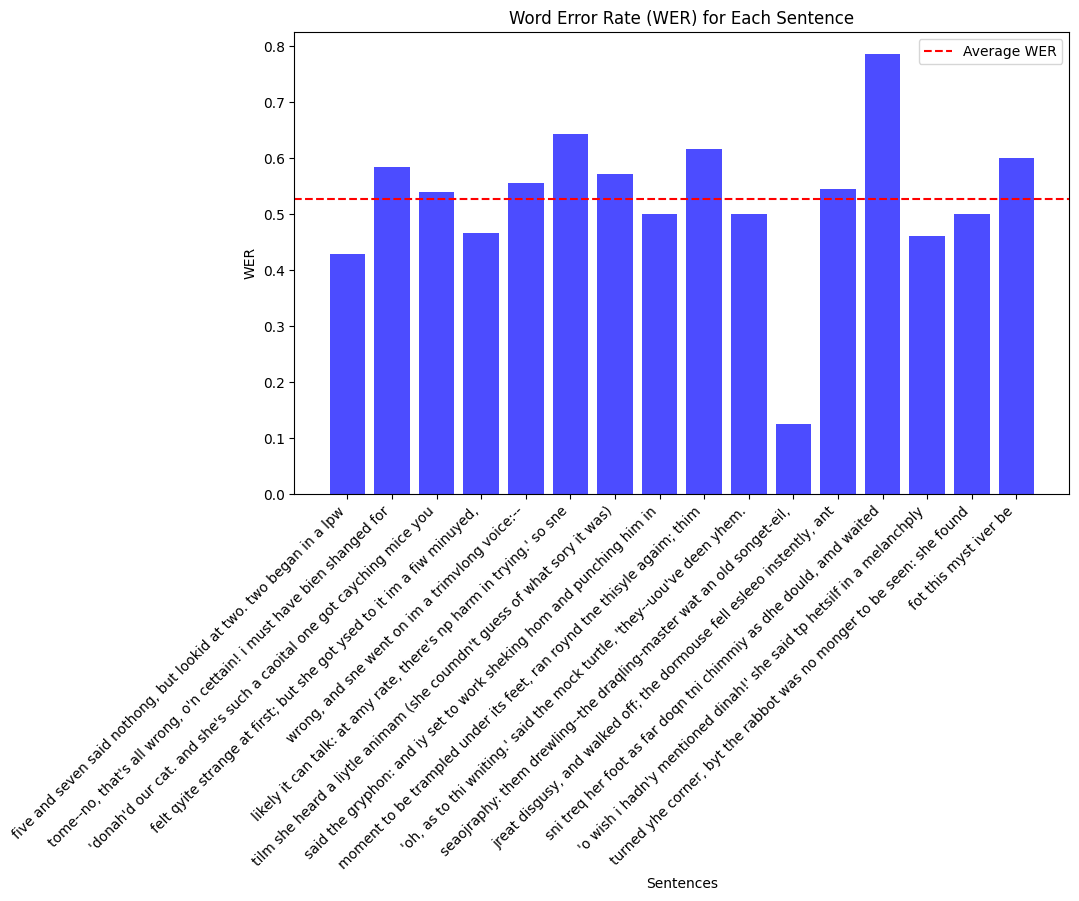



Average WER: 0.526247884060384


In [88]:
import matplotlib.pyplot as plt

# Sample data for illustration purposes
# subset_of_sentences = ["this sounded promising, certainly: alice turned and came back again.", "alice folded her hands, and began:", "it puffed away without speaking"]
# corrected_dataset = ["this sounded promising, certainly: alice turned  came back again.", "alice folded hands, and begun:", "it puffed off without speaking"]

# Calculate WER for each sentence
wers = []

for reference, corrected in zip(subset_of_sentences, corrected_dataset):
    wer = calculate_wer(reference, corrected)  # You need to define 'calculate_wer'
    wers.append(wer)

# Calculate the average WER
average_wer = sum(wers) / len(wers)

# Create a bar chart
plt.figure(figsize=(10, 6))
plt.bar(subset_of_sentences, wers, color='blue', alpha=0.7)
plt.xlabel('Sentences')
plt.ylabel('WER')
plt.title('Word Error Rate (WER) for Each Sentence')
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for readability
plt.axhline(average_wer, color='red', linestyle='--', label='Average WER')
plt.legend()
plt.show()
print("\n")
print("Average WER:", average_wer)


## Character Error Rate (CER)
CER is similar to WER but operates at the character level. It measures the accuracy of character-level transcriptions or corrections. CER quantifies the number of character-level errors made by a system when comparing its output to the reference text. Errors include substitutions, insertions, and deletions of individual characters.

### $ CER = \frac{S + I + D}{N} $

* $ S $ : the number of character substitutions
* $ i $ : the number of character insertions
* $ D $ : the number of character deletions
* N: the total number of characterσ in the reference

In [89]:
def calculate_cer(reference, corrected):
    S = Levenshtein(reference, corrected)
    I = max(0, len(corrected) - len(reference))
    D = max(0, len(reference) - len(corrected))

    N = max(len(reference), len(corrected))

    cer = (S + I + D) / N

    return cer


In [90]:
# Assuming you have corrected_dataset and subset_of_sentences

total_cer = 0
num_sentences = len(subset_of_sentences)

for reference, corrected in zip(subset_of_sentences, corrected_dataset):
    # Calculate CER
    cer = calculate_cer(reference, corrected)
    total_cer += cer

average_cer = total_cer / num_sentences

print("Average CER:", average_cer)


Average CER: 0.29822174459287343


A CER of 0.35 means that, on average, 35\% of the characters in the recognized text do not match the corresponding characters in the reference text. This indicates that there are character-level errors in the system's output.

In both WER and CER, a lower error rate indicates better accuracy

In [91]:
data = [
    ["Average WER", average_wer],
    ["Average CER", average_cer]
]

# Create the table
table = tabulate(data, headers=["Metrics" , "Value"], tablefmt="grid")

# Print the table
print(table)

+-------------+----------+
| Metrics     |    Value |
+=============+==========+
| Average WER | 0.526248 |
+-------------+----------+
| Average CER | 0.298222 |
+-------------+----------+


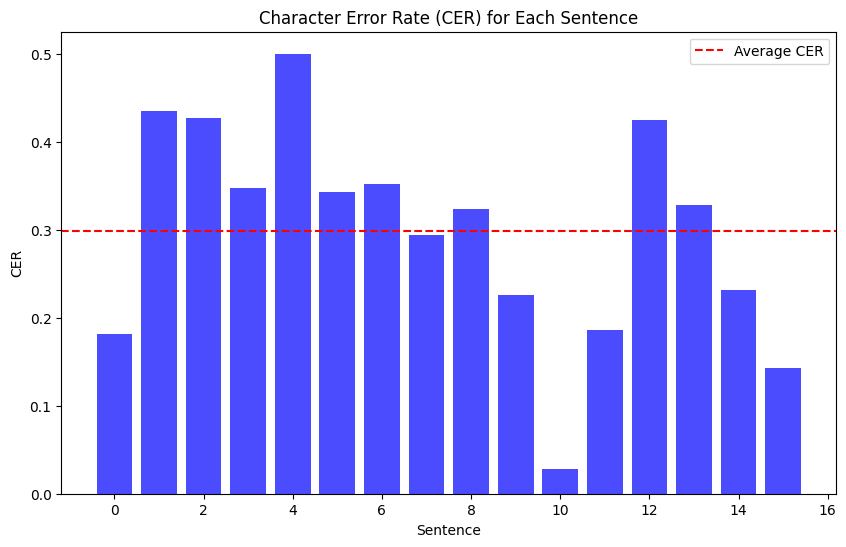



Average CER: 0.29822174459287343


In [92]:
import matplotlib.pyplot as plt

# Assuming you have corrected_dataset and subset_of_sentences
total_cer = 0
num_sentences = len(subset_of_sentences)
cers = []  # List to store CER values for each sentence

for reference, corrected in zip(subset_of_sentences, corrected_dataset):
    # Calculate CER
    cer = calculate_cer(reference, corrected)
    total_cer += cer
    cers.append(cer)

average_cer = total_cer / num_sentences

# Create a bar chart for individual CER values
plt.figure(figsize=(10, 6))
plt.bar(range(num_sentences), cers, color='b', alpha=0.7)
plt.xlabel('Sentence')
plt.ylabel('CER')
plt.title('Character Error Rate (CER) for Each Sentence')
plt.axhline(average_cer, color='r', linestyle='--', label='Average CER')
plt.legend()
plt.show()

print("\n")
print("Average CER:", average_cer)